In [1]:
import os
import sys
import glob
import re
import pprint
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [227]:
sys.path.append('../../statmechlib')
from statmechlib.read_write import read_vasp
from statmechlib.preprocessing import Trajectory, get_stats_Mie

In [4]:
target_raw = '../../../mxene/ti3cn_alf3'
datasets = ['O-termi-ti3cn-data/data-1', 'O-termi-ti3cn-data/data-2', 'F-termi-ti3cn-data/data-1', 'F-termi-ti3cn-data/data-3']

In [5]:
trajdirs = [target_raw + '/' + dataset for dataset in datasets]

In [214]:
trajectories = []
for traj_name in trajdirs:
    trajectories.append(read_vasp(traj_name))

Reading ../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-1/OUTCAR-TI3CNO2-ALF3-RUN1.txt
Reading ../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-1/POSCAR-TI3CNO2-ALF3.vasp
Reading ../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-2/OUTCAR-TI3CNO2-ALF3-RUN2.txt
Reading ../../../mxene/ti3cn_alf3/O-termi-ti3cn-data/data-2/POSCAR-TI3CNO2-ALF3.vasp
Reading ../../../mxene/ti3cn_alf3/F-termi-ti3cn-data/data-1/OUTCAR-TI3CNF2-ALF3-RUN1
Reading ../../../mxene/ti3cn_alf3/F-termi-ti3cn-data/data-1/POSCAR-TI3CNF2-ALF3.vasp
Reading ../../../mxene/ti3cn_alf3/F-termi-ti3cn-data/data-3/OUTCAR-TI3CNF2-ALF3-RUN3
Reading ../../../mxene/ti3cn_alf3/F-termi-ti3cn-data/data-3/POSCAR-TI3CNF2-ALF3.vasp


0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 619
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 426
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 432
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


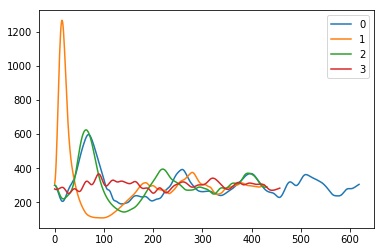

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 619
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 426
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 432
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


<function matplotlib.pyplot.legend(*args, **kwargs)>

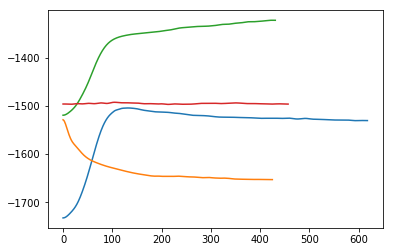

In [215]:
for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=i)

plt.legend()
plt.show()

for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['energy']))
    plt.plot(trj['energy'], label=i)
plt.legend

In [216]:
# Process trajectories - cut out the equilibration periods
#min_conf = [100, 150, 100, 0] # starting indices
min_conf = [0, 0, 0, 0] # starting indices

In [217]:
# cycle over trajectories and eliminate equilibration configurations in all
for i, trj in enumerate(trajectories):
    for key in trj:
        #print('Start:', i, key, len(trj[key]), end=' ')
        if 'atom_num' in key or 'atom_name' in key:
            continue
        if type(trj[key]) == list:
            trj[key][:] = trj[key][min_conf[i]:]
            
        #print('End:', i, key, len(trj[key]))

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 619
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 426
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 432
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


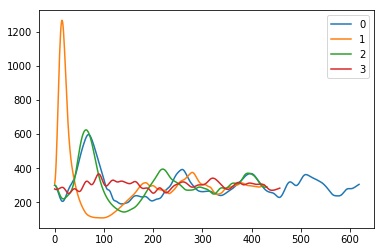

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 619
1 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 426
2 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 432
3 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


<function matplotlib.pyplot.legend(*args, **kwargs)>

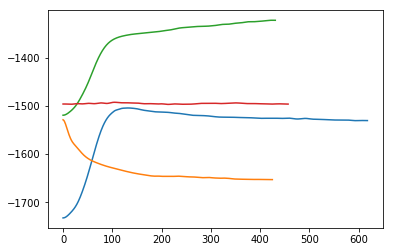

In [218]:
for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=i)

plt.legend()
plt.show()

for i, trj in enumerate(trajectories):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['energy']))
    plt.plot(trj['energy'], label=i)
plt.legend

In [219]:
trjs = []
for trj in trajectories:
    trj['ensemble'] = 'npt'
    trjs.append(Trajectory(trj, inplace=False))

In [220]:
trj_f = trjs[3]

In [221]:
#trj_f.append(trjs[2])

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 519
1 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


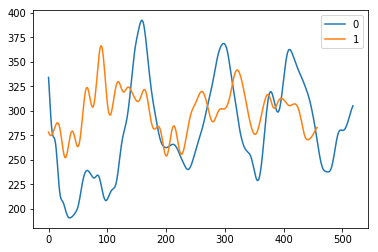

0 [('C', 32), ('N', 32), ('Ti', 96), ('O', 64), ('Al', 4), ('F', 12)] 519
1 [('C', 32), ('N', 32), ('Ti', 96), ('F', 76), ('Al', 4)] 458


<function matplotlib.pyplot.legend(*args, **kwargs)>

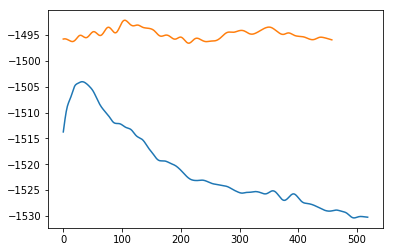

In [222]:
for i, trj in enumerate([trj_o, trj_f]):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['temp']))
    plt.plot(trj['temp'], label=i)

plt.legend()
plt.show()

for i, trj in enumerate([trj_o, trj_f]):
    #for key in trj:
    print(i, list(zip(trj['atom_name'], trj['atom_num'])), len(trj['energy']))
    plt.plot(trj['energy'], label=i)
plt.legend

In [223]:
#trj_o.to_xyz(os.path.join(target_raw, 'mx_o.xyz'))

In [228]:
trj_f.to_xyz(os.path.join(target_raw, 'mx_f.xyz'))
trjs[2].to_xyz(os.path.join(target_raw, 'mx_f0.xyz'))
trjs[0].to_xyz(os.path.join(target_raw, 'mx_o0.xyz'))

In [69]:
trj_f._trajectory.keys()

dict_keys(['box', 'xyz', 'atom_type', 'energy', 'forces', 'temp', 'free_energy', 'total_energy', 'atom_num', 'box0', 'xyz0', 'atom_type0', 'atom_name', 'ensemble'])

In [71]:
trj_f['box'][0]

array([[12.26800591,  0.        ,  0.        ],
       [-6.12871001, 10.63327471,  0.        ],
       [ 0.        ,  0.        , 22.39172064]])

In [72]:
trj_f_big = trj_f.replicate(vec_a=2, vec_b=2, vec_c=1)

atom_type 458 458


In [74]:
trj_f['box'][0], trj_f_big['box'][0]

(array([[12.26800591,  0.        ,  0.        ],
        [-6.12871001, 10.63327471,  0.        ],
        [ 0.        ,  0.        , 22.39172064]]),
 array([[ 24.53601182,   0.        ,   0.        ],
        [-12.25742002,  21.26654942,   0.        ],
        [  0.        ,   0.        ,  22.39172064]]))

In [75]:
trj_f_big.to_xyz(os.path.join(target_raw, 'mx_f_big.xyz'))

In [191]:
stats_big = [get_stats_Mie(xyz, box, atype, ms=[12, 6], rcut=8.0) for xyz, box, atype in zip(trj_f_big['xyz'][:2], trj_f_big['box'][:2], trj_f_big['atom_type'][:2])]

rcut: 8.0 (960, 960) (960, 960) (960, 960)
rcut: 8.0 (960, 960) (960, 960) (960, 960)


In [192]:
[s[0] for s in stats_big]

[{(0, 0): [0.03162699484710008, 0.6525214192650043],
  (0, 1): [0.10672188400541137, 1.6456098108578487],
  (0, 2): [0.08980721870694111, 8.130457894749211],
  (0, 3): [0.0008197648577815001, 0.6534306368314461],
  (0, 4): [1.0896124071947332e-06, 0.010061281492170431],
  (1, 1): [0.0003984254182350491, 0.305249168529528],
  (1, 2): [0.09797523164407955, 8.283863072227104],
  (1, 3): [0.0013876158843156756, 0.7949456979607498],
  (1, 4): [1.4066108079657566e-06, 0.010485025352389732],
  (2, 2): [0.003886293902995668, 2.977894095198382],
  (2, 3): [0.08397988232140166, 7.905704032368878],
  (2, 4): [3.551735270483283e-05, 0.06841585160076499],
  (3, 3): [0.007554726045737894, 2.556123720537764],
  (3, 4): [0.0803510575908502, 2.5779593104283736],
  (4, 4): [3.325807140913793e-08, 0.0005309305926080219]},
 {(0, 0): [0.031601778590005035, 0.6527506032628334],
  (0, 1): [0.10722600423540615, 1.647295504723056],
  (0, 2): [0.08997513233925168, 8.137276409146548],
  (0, 3): [0.00081864164366

In [187]:
stats = [get_stats_Mie(xyz, box, atype, ms=[12, 6], rcut=8.0) for xyz, box, atype in zip(trj_f['xyz'][:2], trj_f['box'][:2], trj_f['atom_type'][:2])]

Replicating: 2 2 1
rcut: 8.0 (240, 960) (240, 960) (240, 960)
Replicating: 2 2 1
rcut: 8.0 (240, 960) (240, 960) (240, 960)


In [188]:
[s[0] for s in stats]

[{(0, 0): [0.007906748711775052, 0.16313035481625124],
  (0, 1): [0.026680471001352783, 0.41140245271446196],
  (0, 2): [0.022451804676735285, 2.0326144736873033],
  (0, 3): [0.00020494121444537505, 0.16335765920786152],
  (0, 4): [2.724031017986833e-07, 0.002515320373042608],
  (1, 1): [9.960635455876223e-05, 0.07631229213238201],
  (1, 2): [0.024493807911019884, 2.0709657680567757],
  (1, 3): [0.0003469039710789188, 0.19873642449018736],
  (1, 4): [3.5165270199143894e-07, 0.0026212563380974326],
  (2, 2): [0.000971573475748917, 0.7444735237995957],
  (2, 3): [0.020994970580350405, 1.9764260080922191],
  (2, 4): [8.879338176208207e-06, 0.017103962900191248],
  (3, 3): [0.0018886815114344743, 0.639030930134441],
  (3, 4): [0.020087764397712562, 0.6444898276070936],
  (4, 4): [8.314517852284482e-09, 0.00013273264815200547]},
 {(0, 0): [0.007900444647501175, 0.1631876508157079],
  (0, 1): [0.026806501058851497, 0.4118238761807639],
  (0, 2): [0.022493783084812938, 2.034319102286638],
  (

In [204]:
stats[0][1][(0, 0)][-1][0]

array([-0.00022955, -0.00010835,  0.00035975])

In [208]:
stats_big[0][1][(0, 0)][-1][240]

array([-0.00022955, -0.00010835,  0.00035975])

1. Set charges based on Weiwei's charge info and past force fields
2. Take input parameters from the previous optimization
3. Create energy and force function for fitting (Start from EAM notebook)
4. Optimize

In [210]:
trj_o['box'][0], trj_f['box'][0]

(array([[12.06557696,  0.        ,  0.        ],
        [-6.05432642, 10.43313152,  0.        ],
        [ 0.        ,  0.        , 22.02162543]]),
 array([[12.26800591,  0.        ,  0.        ],
        [-6.12871001, 10.63327471,  0.        ],
        [ 0.        ,  0.        , 22.39172064]]))